In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('algerian_forest_fires_cleand_dtaset.csv')

In [22]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [23]:
df = df.drop(['day','month','year'],axis=1)

In [24]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)


In [26]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [27]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [28]:
## seperate independent and dependent features
x = df.drop('FWI',axis=1)
y=df['FWI']

In [29]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [31]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [32]:
#train test split
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [34]:
x_train.shape

(182, 11)

In [35]:
x_test.shape

(61, 11)

In [36]:
corr = x_train.corr()

<Axes: >

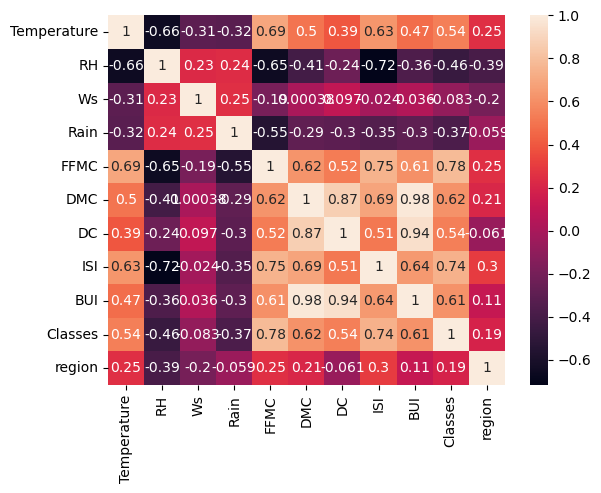

In [37]:
sns.heatmap(corr,annot = True)

In [38]:
  def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [39]:
high_corr_features = correlation(x_train, 0.85)
high_corr_features

{'BUI', 'DC'}

In [40]:
x_train.drop(labels=high_corr_features, axis=1, inplace=True)
x_test.drop(labels=high_corr_features, axis=1, inplace=True)

x_train.shape, x_test.shape

((182, 9), (61, 9))

In [41]:
#standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [42]:
x_train_scaled


array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

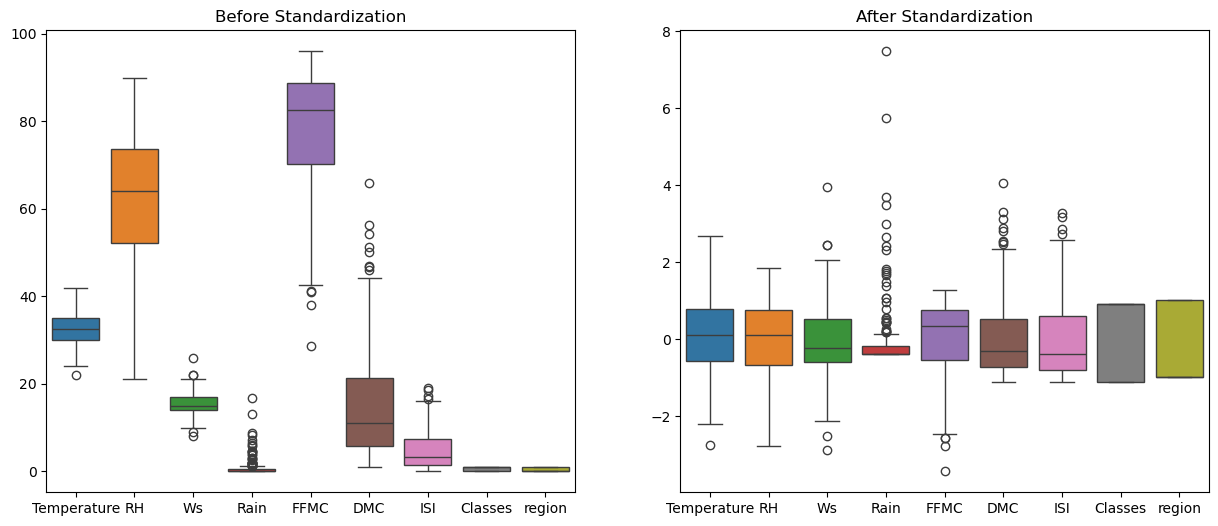

In [43]:
#boxplot to understand standard scaler
#sns.boxplot(data=x_train)
#sns.boxplot(data=x_train_scaled)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(data=x_train, ax=axes[0])
axes[0].set_title('Before Standardization')

sns.boxplot(data=pd.DataFrame(x_train_scaled, columns=x_train.columns), ax=axes[1])
axes[1].set_title('After Standardization')

plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
linear_reg = LinearRegression()
linear_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import mean_absolute_error
y_pred = linear_reg.predict(x_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mae


0.5468236465249976

In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9847657384266951

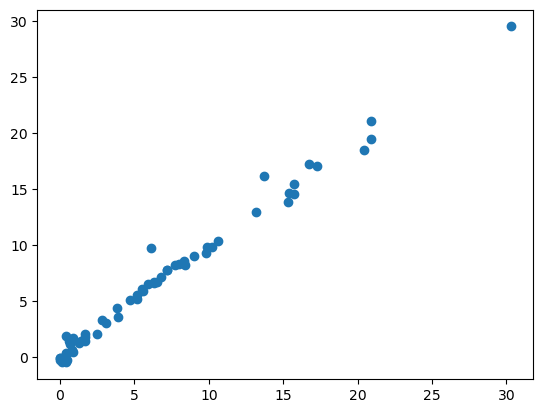

In [50]:
plt.scatter(y_test,y_pred)

In [53]:
##lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso = lasso.predict(x_test_scaled)
mean_lasso = mean_absolute_error(y_test,y_pred_lasso)
r2_lasso = r2_score(y_test,y_pred_lasso)
print(mean_lasso)
print(r2_lasso)

1.1331759949144085
0.9492020263112388


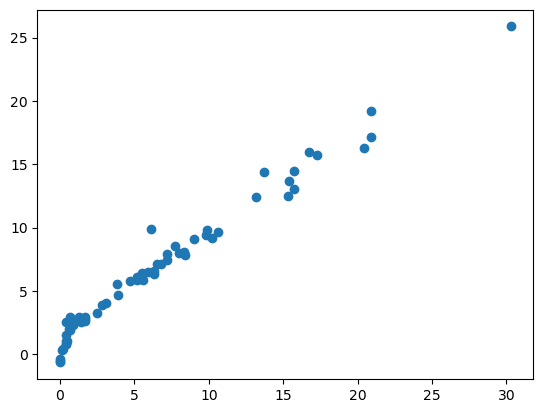

In [54]:
plt.scatter(y_test,y_pred_lasso)

In [55]:
## ridge regression 
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred_ridge = ridge.predict(x_test_scaled)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Mean Absolute Error: {mae_ridge}")
print(f"Ridge R2 Score: {r2_ridge}")

Ridge Mean Absolute Error: 0.5642305340105693
Ridge R2 Score: 0.9842993364555513


Elastic Net Mean Absolute Error: 1.8822353634896
Elastic Net R2 Score: 0.8753460589519703


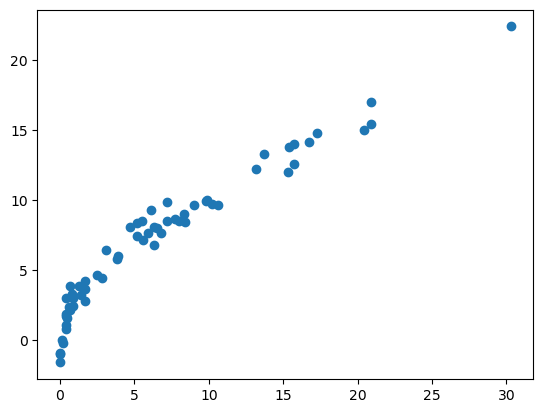

In [58]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()
elastic_net.fit(x_train_scaled, y_train)
y_pred_enet = elastic_net.predict(x_test_scaled)
mae_enet = mean_absolute_error(y_test, y_pred_enet)
r2_enet = r2_score(y_test, y_pred_enet)

print(f"Elastic Net Mean Absolute Error: {mae_enet}")
print(f"Elastic Net R2 Score: {r2_enet}")

plt.scatter(y_test,y_pred_enet)

In [62]:
## cross valodaion
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train_scaled,y_train)


LassoCV(cv=5)

In [65]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [66]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [68]:
y_pred = lassocv.predict(x_test_scaled)

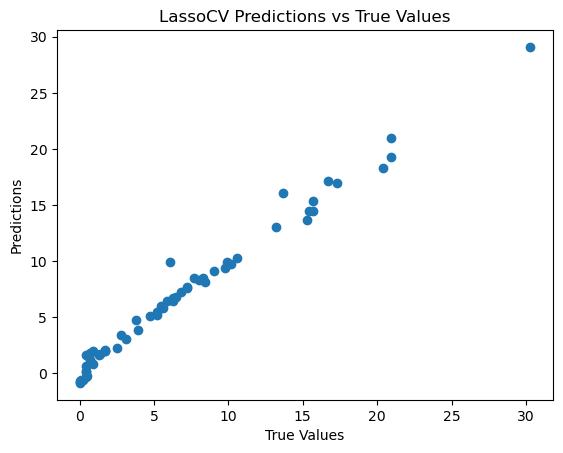

In [69]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('LassoCV Predictions vs True Values')
plt.show()

In [70]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(x_train_scaled, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

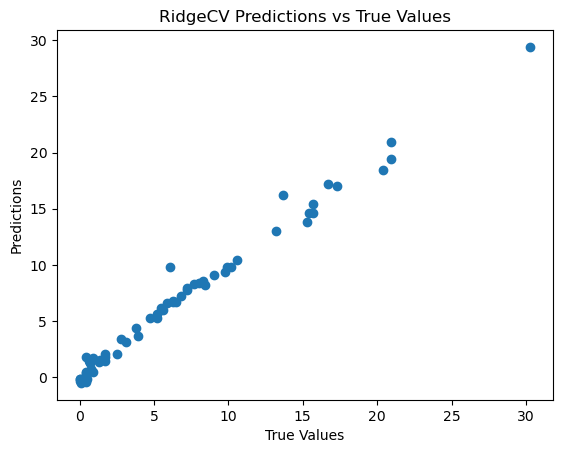

In [71]:
y_pred_ridge = ridge_cv.predict(x_test_scaled)

plt.scatter(y_test, y_pred_ridge)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('RidgeCV Predictions vs True Values')
plt.show()

In [72]:
print(f"Selected alpha: {ridge_cv.alpha_}")
print(f"Alphas tried: {ridge_cv.alphas}")

Selected alpha: 1.0
Alphas tried: [0.1, 1.0, 10.0]


In [73]:
from sklearn.linear_model import ElasticNetCV

elastic_cv = ElasticNetCV(cv=5)
elastic_cv.fit(x_train_scaled, y_train)

ElasticNetCV(cv=5)

In [74]:
print(f"Selected alpha: {elastic_cv.alpha_}")
print(f"Alphas tried: {elastic_cv.alphas_}")
print(f"L1 ratio: {elastic_cv.l1_ratio_}")

Selected alpha: 0.04311146156383891
Alphas tried: [14.11706004 13.16561744 12.27829889 11.45078264 10.67903821  9.95930678
  9.28808283  8.66209714  8.07830078  7.53385034  7.02609405  6.55255882
  6.11093829  5.6990815   5.31498248  4.95677045  4.62270071  4.31114616
  4.02058933  3.74961507  3.49690356  3.26122397  3.04142839  2.83644629
  2.64527931  2.46699633  2.30072904  2.1456676   2.00105679  1.86619226
  1.74041714  1.62311885  1.51372607  1.411706    1.31656174  1.22782989
  1.14507826  1.06790382  0.99593068  0.92880828  0.86620971  0.80783008
  0.75338503  0.7026094   0.65525588  0.61109383  0.56990815  0.53149825
  0.49567705  0.46227007  0.43111462  0.40205893  0.37496151  0.34969036
  0.3261224   0.30414284  0.28364463  0.26452793  0.24669963  0.2300729
  0.21456676  0.20010568  0.18661923  0.17404171  0.16231189  0.15137261
  0.1411706   0.13165617  0.12278299  0.11450783  0.10679038  0.09959307
  0.09288083  0.08662097  0.08078301  0.0753385   0.07026094  0.06552559
  